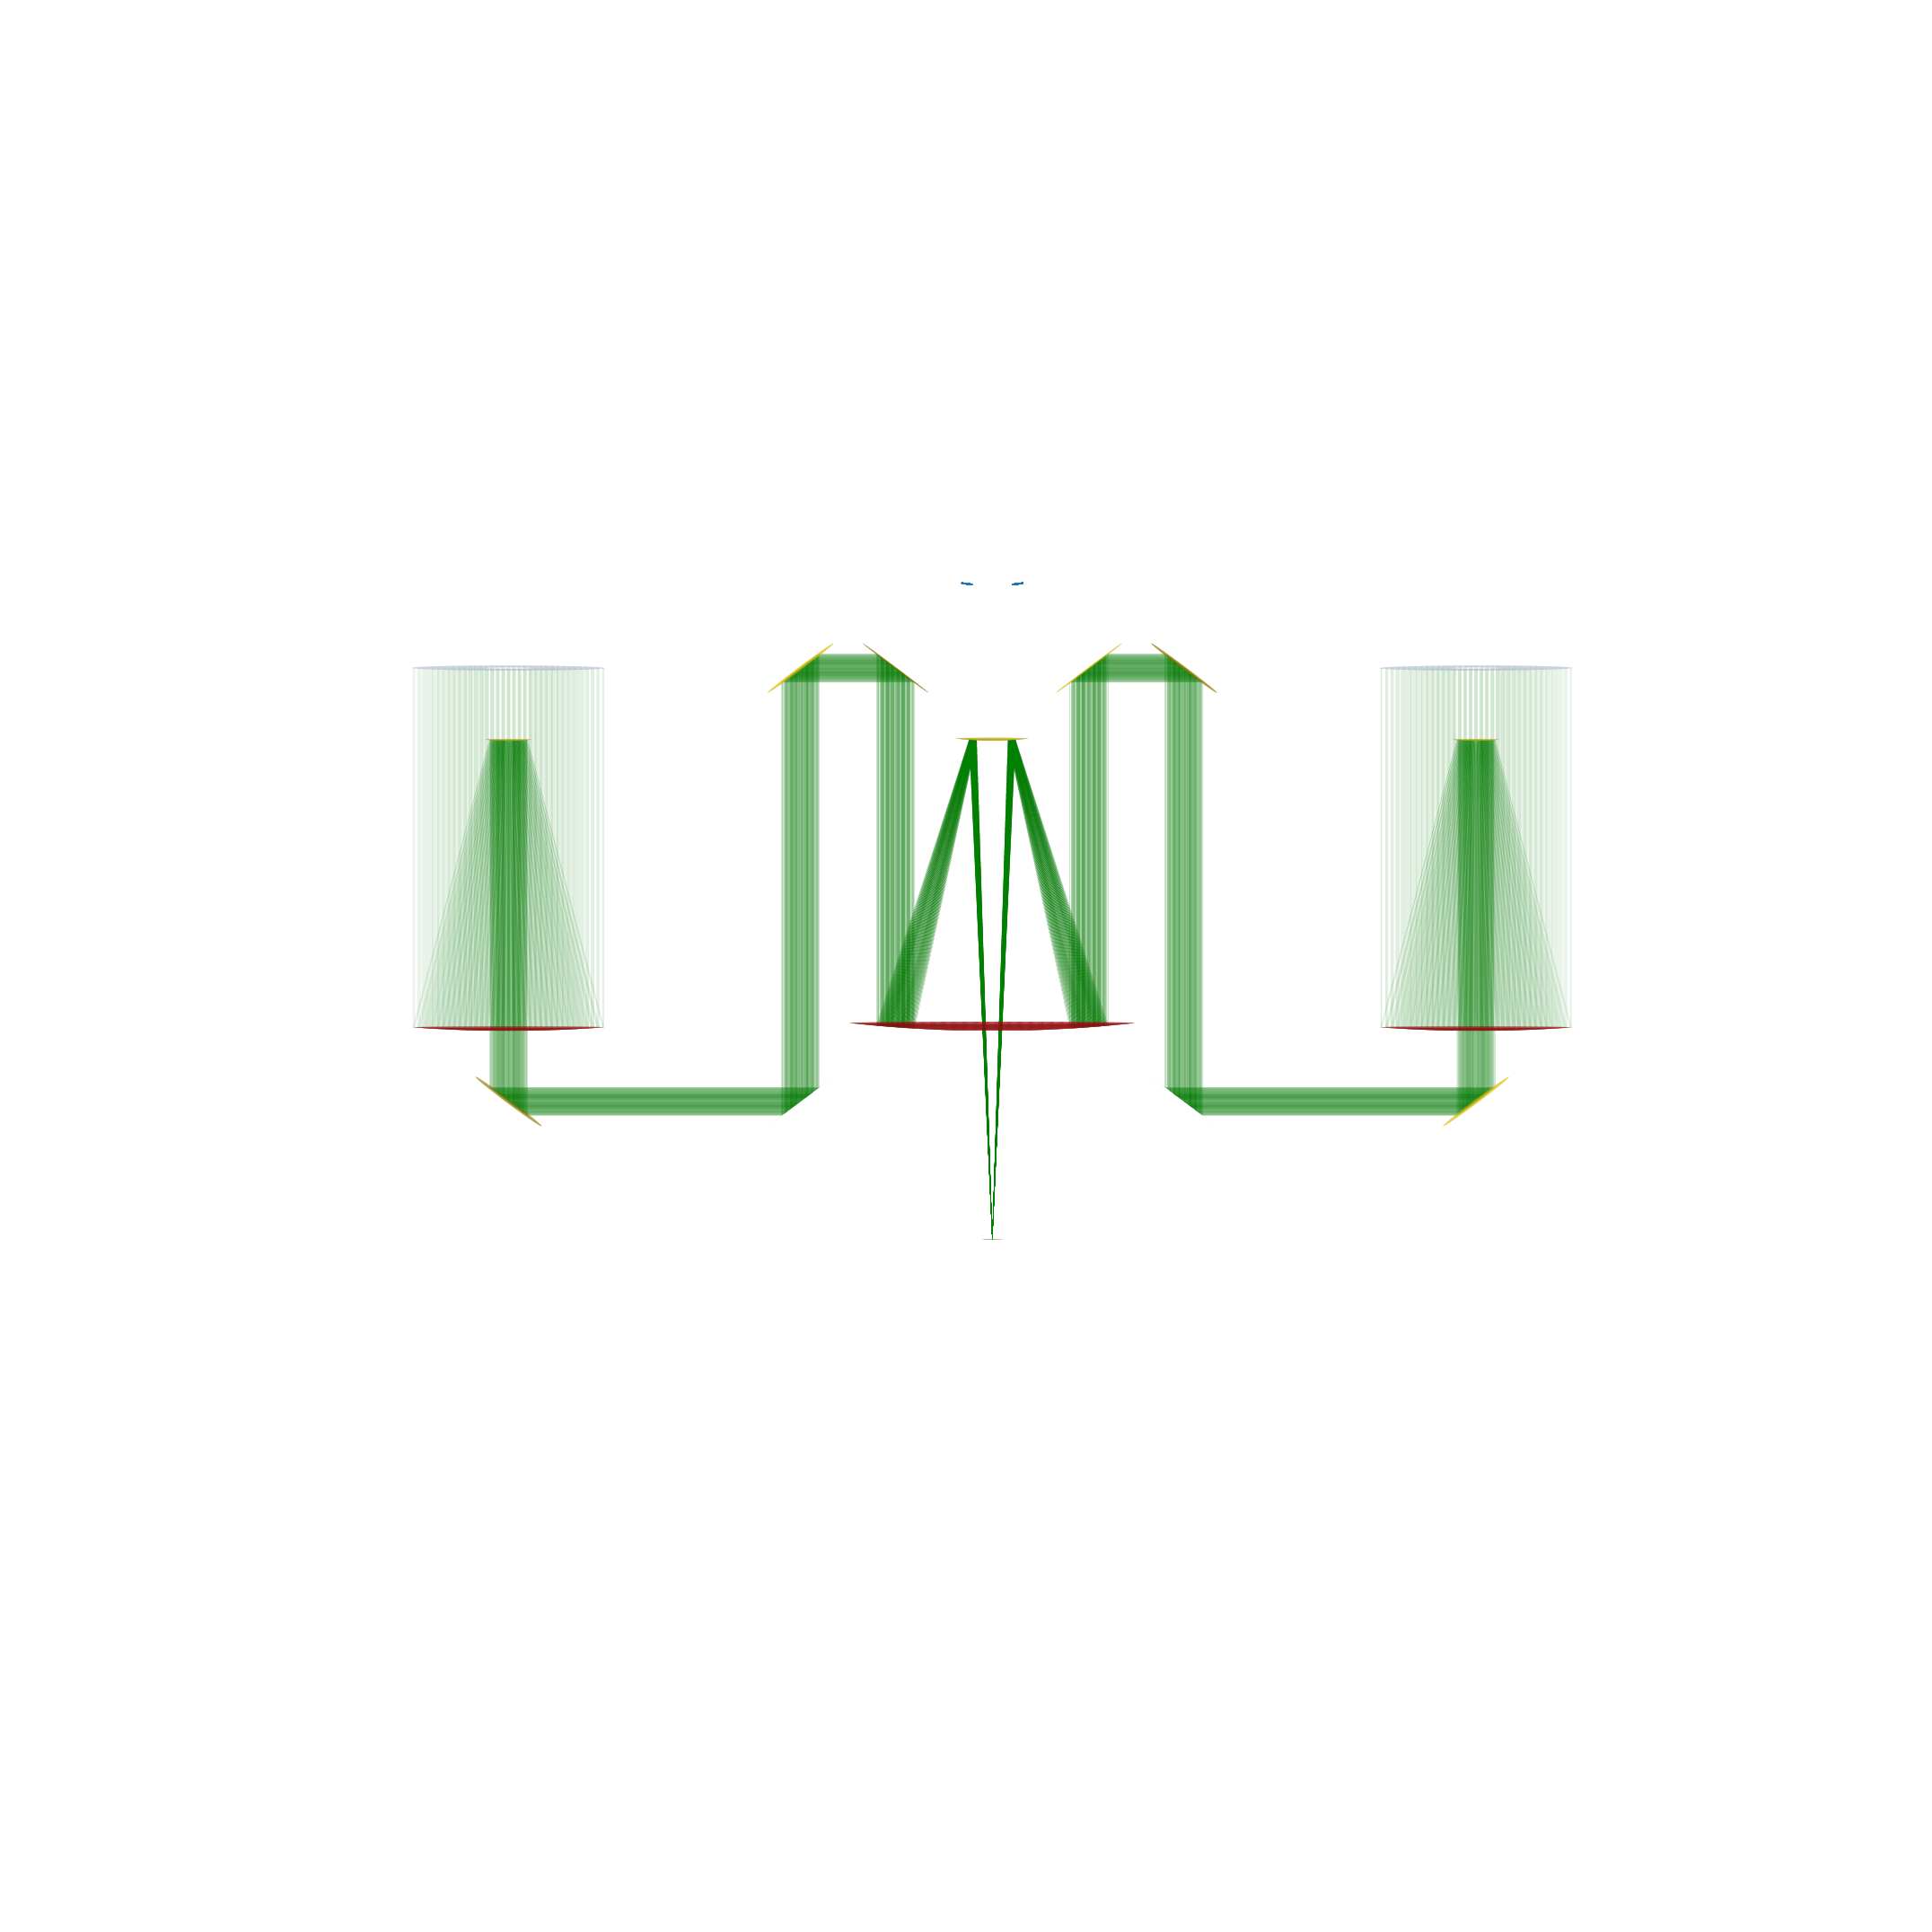

In [145]:
import pimms.optics as op
reload(op)
reload(op.lins)
sim=op.SIM(init_b=10., detector_a=.15)
opn=op.OpticalPathNetwork(sim)
src=op.LightSource((0., np.deg2rad(0.), np.inf))
p,q=src(sim.get_entrance(), 1000, 1, sampling='uniform')
pt,mt=sim.trace_network(q,opn)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1)
sim.draw(raytrace=pt,axes=ax,draw_virtual=True,view_angles=(0,-90))
plt.show()

In [16]:
print(np.unique(mt[-1]))
m=np.bool_(mt[-1]==0)
np.max(pt[-1]['direction'][m,2])

[-1  0  4]


1.0000000000000002

Batch 1: 1970 rays traced on objects.
Batch 1: 1970 rays perturbed.
Batch 1: 1970 backwards rays traced before exit.
Batch 1: 1632 intersections solved,S-stats: -3.55E-14 (min), 3.55E-14 (max), -1.04E-14 (avg).
Batch 1: 1632 samplings collected.
Batch 2: 1974 rays traced on objects.
Batch 2: 1974 rays perturbed.
Batch 2: 1974 backwards rays traced before exit.
Batch 2: 1644 intersections solved,S-stats: -3.82E-14 (min), 2.58E-14 (max), -1.02E-14 (avg).
Batch 2: 1644 samplings collected.
Batch 3: 1972 rays traced on objects.
Batch 3: 1972 rays perturbed.
Batch 3: 1972 backwards rays traced before exit.
Batch 3: 1628 intersections solved,S-stats: -3.73E-14 (min), 3.11E-14 (max), -1.01E-14 (avg).
Batch 3: 1628 samplings collected.
Batch 4: 1966 rays traced on objects.
Batch 4: 1966 rays perturbed.
Batch 4: 1966 backwards rays traced before exit.
Batch 4: 1626 intersections solved,S-stats: -3.46E-14 (min), 2.93E-14 (max), -1.05E-14 (avg).
Batch 4: 1626 samplings collected.
Batch 5: 1969 ra

(0.84452969470006, 1.4756486932268047)

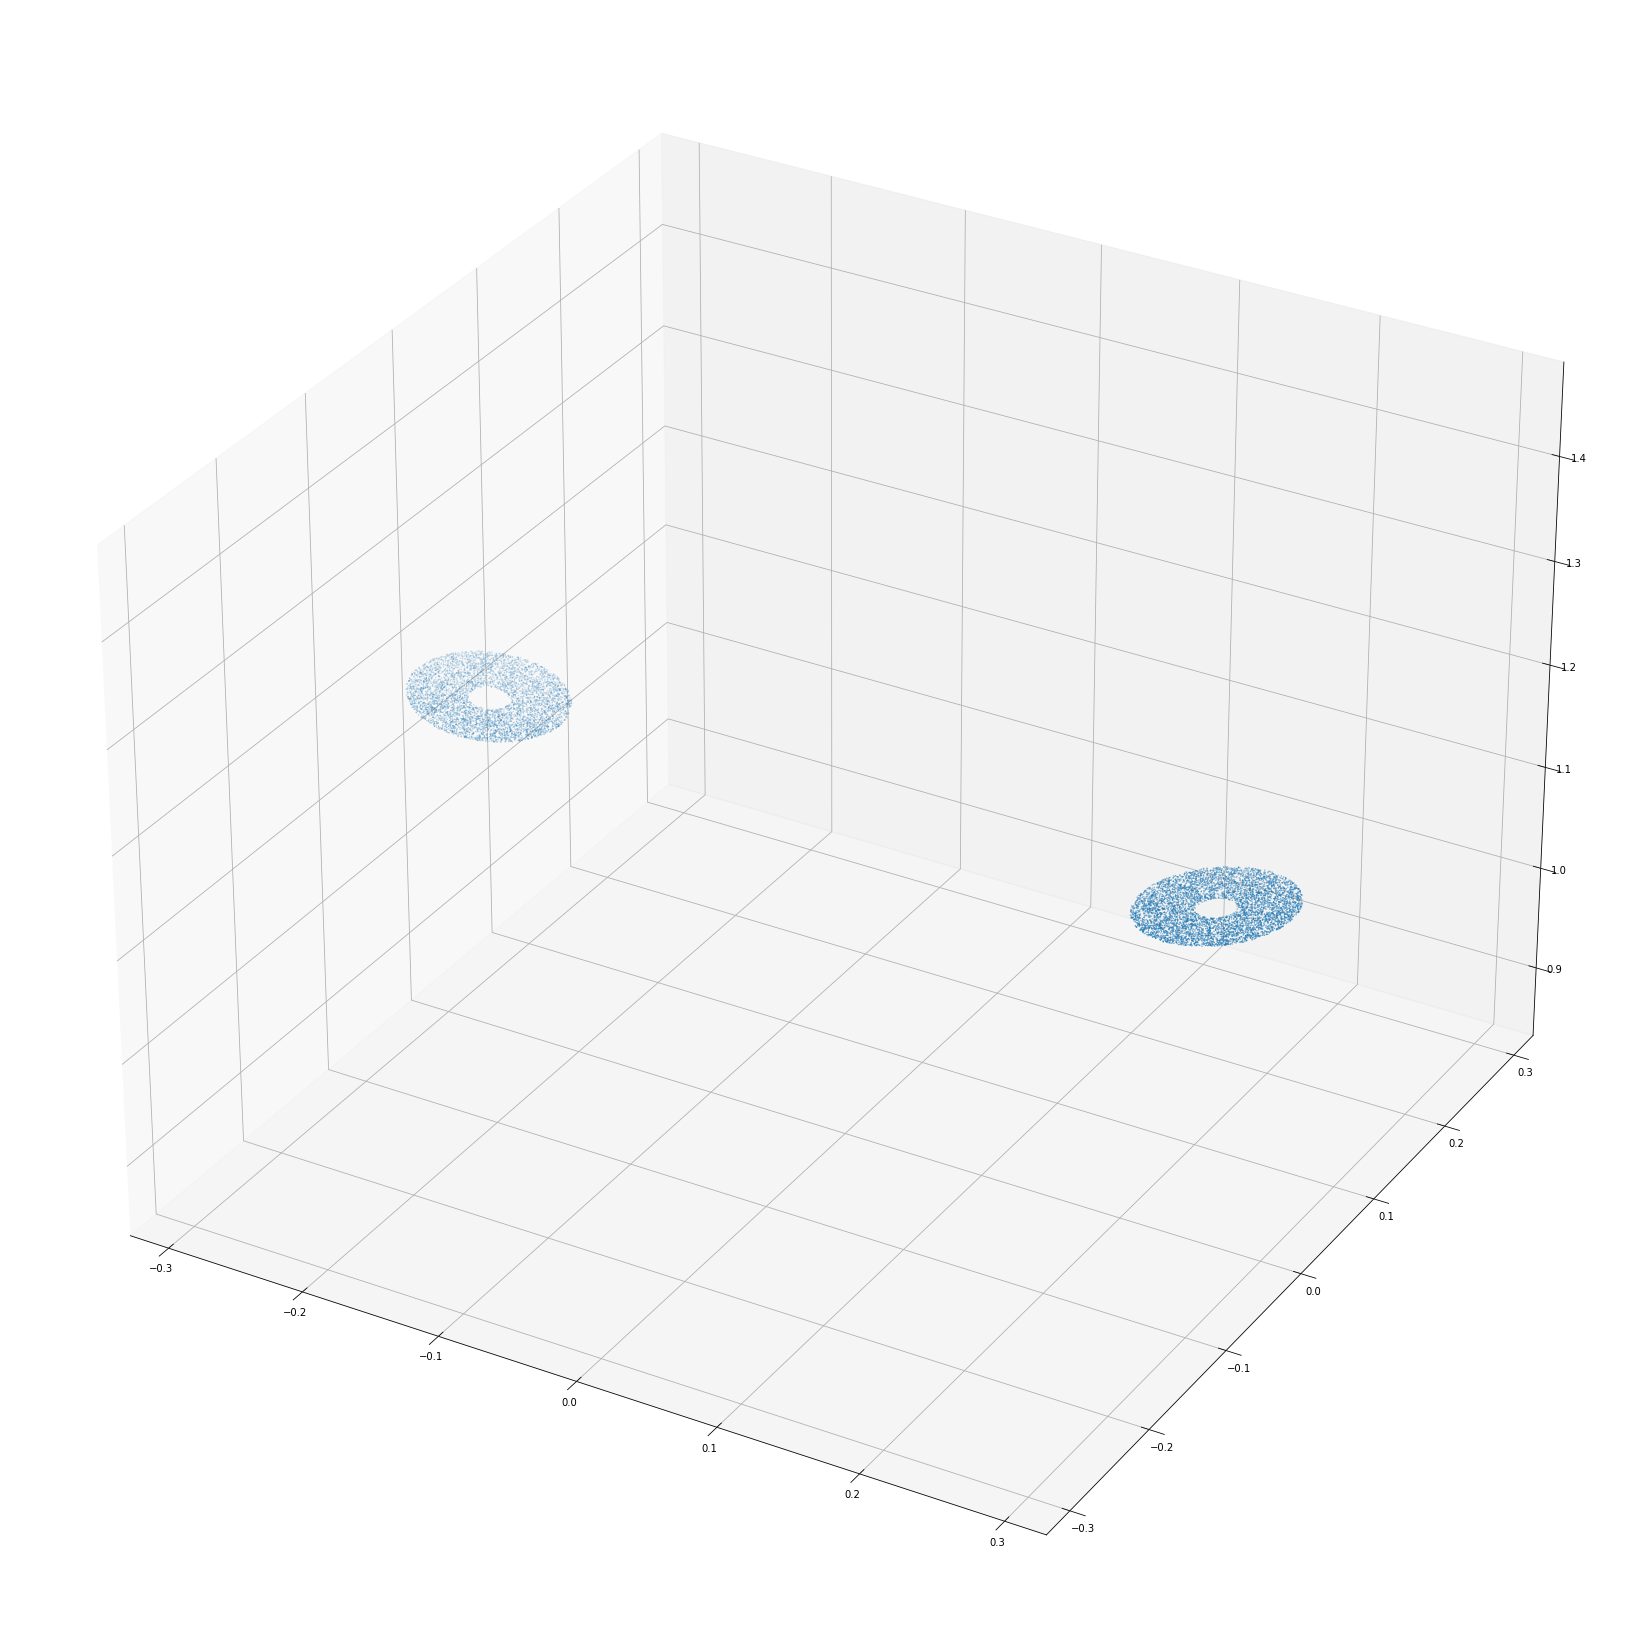

In [154]:
stops=opn.aperture_stop()
n=opn.find_image(stops,'exit',perturbation=1e-3,min_samplings=10000,batch_rays=1000,verbose=True)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1)
extent=max(np.max(n[:,0])-np.min(n[:,0]), np.max(n[:,1])-np.min(n[:,1]), np.max(n[:,2])-np.min(n[:,2]))
ax.set_xlim([np.mean(n[:,0])-extent/2.,np.mean(n[:,0])+extent/2.])
ax.set_ylim([np.mean(n[:,1])-extent/2.,np.mean(n[:,1])+extent/2.])
ax.set_zlim([np.mean(n[:,2])-extent/2.,np.mean(n[:,2])+extent/2.])

In [64]:
import pimms.optics as op
reload(op)
sim=op.SIM()
src=op.LightSource((0.,0.,np.inf))
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),100,1,sampling='crosshair')
%time pt0,mt0=sim.trace(q)
%time pt1,mt1=sim.trace_network(q,opn)
print(np.all(pt0==pt1))

CPU times: user 708 ms, sys: 239 ms, total: 947 ms
Wall time: 704 ms
CPU times: user 114 ms, sys: 28.7 ms, total: 143 ms
Wall time: 117 ms
True


In [65]:
pt,mt=sim.trace_network(q,opn,starts=sim.collectors[1].get_primaries(),stops=sim.get_detectors())

In [49]:
import pymath.linsolvers as lins
reload(lins)
r,s=lins.two_lines_intersection(pt[1]['position'],pt[1]['direction'],pt[2]['position'],pt[2]['direction'])
m=~np.isnan(s)
print(np.max(s[m]))

2.1316282072971027e-14


In [77]:
a=opn.aperture_stop()

In [79]:
nodes=[]
for obj in a:
    nodes += [node for node in opn.successors(obj)]

In [87]:
pt.ravel().shape

(10000,)